# Data_Reddit

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
data = pd.read_csv("../data/data_english/mbti_reddit.csv", usecols=["comment","type","author"])
data.head()

,author,type,comment
0,MetricExpansion,entp,Those stats come from the test. [Echoing the c...
1,MetricExpansion,entp,"That's great to hear! I hope you know that, de..."
2,MetricExpansion,entp,I can totally agree on reticence! With respect...
3,MetricExpansion,entp,I took it several times. I'm typed as TYPE_MEN...
4,MetricExpansion,entp,Gawd it's like we don't even need drugs to be ...


In [2]:
data.drop_duplicates(subset="comment",inplace=True)                   #Eliminar comentarios repetidos (SPAM)

#............................................................................................................

#Eliminar autores que tienen más de una personalidad: (Hay autores con dos "types" distintos)
agrupado = data.groupby("author")["type"].apply(lambda x: x.nunique())
filtrar_autores = agrupado[agrupado==1].index
data = data[data["author"].isin(filtrar_autores)]


data["word_count"] = data.comment.apply(lambda x: len(x.split()))     # Contar palabras por comentario 
data = data[(data["word_count"]>=5)&(data["word_count"]<=40)]        #Filtrar comentarios entre 5 y 40 palabras
data = data.groupby("author").filter(lambda x: len(x) >= 50)          #Autores que tengan al menos 50 posts
data = data.sample(frac=1).reset_index(drop=True)                   #Shuffle data

#............................................................................................................
data = data.groupby("author").head(50)                             #Tomar 50 posts por usuario
data["comment"] = data["comment"].replace("|"," ")   #Eliminar "|" para no confundirlo con mi marcador "|||"

#Agrupar comentarios de usuarios 
data = data.groupby(['author',"type"])["comment"].unique().apply(lambda x: ' ||| '.join(x)).reset_index()

data_reddit = data.copy()
del data

data_reddit.drop("author",axis=1,inplace=True)
print(data_reddit.shape)
data_reddit.head()

print(data_reddit.shape)
data_reddit.head()

(9397, 2)
(9397, 2)


,type,comment
0,intj,Sister. For fucks sake she might be and no one...
1,intp,Someone here is shadow banned ||| that is kind...
2,entp,I've seen results about voltage differences. I...
3,entj,20 something European person. I have seriously...
4,intp,"Man, during 1991? I grew up watching The Simps..."


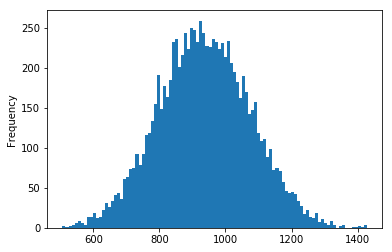

In [3]:
data_reddit.comment.apply(lambda x: len(x.split())).plot(kind="hist",bins=100);  #Distribución de palabras 

### Data Kaggle

In [4]:
import pandas as pd 
data = pd.read_csv("../data/data_english/mbti_personalitycafe.csv")
data.columns = ["type","comment"]
data["type"] = data["type"].apply(lambda x: x.lower())

data_kaggle = data.copy()
del data
print(data_kaggle.shape)
data_kaggle.head()

(8675, 2)


,type,comment
0,infj,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,entp,'I'm finding the lack of me in these posts ver...
2,intp,'Good one _____ https://www.youtube.com/wat...
3,intj,"'Dear INTP, I enjoyed our conversation the o..."
4,entj,'You're fired.|||That's another silly misconce...


In [49]:
data = pd.concat([data_kaggle,data_reddit]).sample(frac=1).reset_index(drop=True)
data

,type,comment
0,infj,"The thing about dogs, they're better than peop..."
1,enfp,"Haha he's only 4 years older than me, so I hav..."
2,enfp,Leahomme he was tested for university LemonI...
3,istp,you need to come to Canada! ||| you forgot thi...
4,intp,'My ex invited me to her cheese and wine party...
...,...,...
18067,istp,"'pretty much on the same boat, only difference..."
18068,isfp,Are you joking.....birds don't only fly in the...
18069,intj,'You should see my backgrounds folder. Beautif...
18070,intp,'Bars are still the best. Just make sure you g...


### Eliminar cualquier mención a la personalidad para evitar hacer "trampas"

In [7]:
import pandas as pd 
data = pd.read_csv("../data/data_english/data.csv")

In [8]:
mbti = ['intj', 'enfp', 'entp', 'intp', 'esfp', 'infp', 'infj', 'istp', 'istj', 'entj','enfj', 'isfj', 'estj', 'estp', 'isfp', 'esfj']
mbti = mbti+[x+"s" for x in mbti]   #Algunas están codificadas como "infjs entps esfps etc"
def remove_mbti(x):
    x = x.lower()
    x = str(x)
    for tipo in mbti:
        if tipo in x:
            x = x.replace(tipo, "typemention")
    return x

In [9]:
data["comment"] = data.comment.apply(lambda x: x.replace("TYPE_MENTION","typemention")) # Cambiar codificación 
data["comment"] = data.comment.apply(remove_mbti)  

### Limpiar texto

In [1]:
import re 
def clean_text(x):

    x = x.lower()

    x = re.compile('htt\S+').sub(' enlace ',x)
    x = re.compile('@\S+').sub(' mencion ',x)
    x = re.compile('#\S+').sub(' hashtag ',x)
    
    x = re.sub(r"[^a-zA-Z.]", ' ', x)      #A exepción de ' para las contraciones
    x = re.sub(r" +", ' ', x)
    return x

frase = """hey bro you HAVE to look this link: https://www.youtube.com/watch?v=oavMtUWDBTM&ab_channel=RealPapaPit,
@Paco sent it to me,       did you know? *^´   "   I'm the best"""
clean_text(frase)

'hey bro you have to look this link enlace mencion sent it to me did you know i m the best'

In [11]:
data["clean_comment"] = data["comment"].apply(clean_text)

In [10]:
data.clean_comment[0]

'the thing about dogs they re better than people. good night sweet linda you will be sorely missed.my sincere condolences. it s well within the bounds of shamanism but it s not for a beginning practitioner. an inexperienced shaman an actually do more harm than good. so much winning i can t take it anymore mr. president i agree. this kid s going to go far in life. that is what happens when you lead from the rear. things don t get taken care of people are left out to dry lines are crossed without repercussions and the wolves slaughter the sheep in the flock. nice to see a life in pictures. thanks for uploading. mccain is a traitor to this country. welcome to the family. i ve been saying it most of my life but it really really feels good when someone with an actual voice says it. amazing answer thank you for sharing. this is where we fight and what exactly is wrong with typemention hrm absolutely what i did too. never thought i would say this but i think j. edgar hoover did a lot of good 

In [12]:
data["word_count"] =  data["clean_comment"].apply(lambda x: len(x.split()))

In [13]:
data = data[(data["word_count"]>=250)&(data["word_count"]<=2000)]

In [13]:
data.word_count.describe()

count    18023.000000
mean      1111.135993
std        314.800005
min        255.000000
25%        876.000000
50%       1039.000000
75%       1353.000000
max       1984.000000
Name: word_count, dtype: float64

### Save data

In [14]:
data.to_csv("../data/data_english/data.csv",index=False)

# Tokenizer

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["clean_comment"])
print("Tokenizer Ready")

# Thanks to "Dr. Fuzzy" for remove in tokenizer : https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/discussion/49654
min_frequency = 2      #Eliminar palabras que no se repitan al menos 2 veces 
remove_words = [w for w,c in tokenizer.word_counts.items() if c <= min_frequency]
for word in remove_words:
    del tokenizer.word_index[word]
    del tokenizer.word_docs[word]
    del tokenizer.word_counts[word]
print(f"Removed {len(remove_words)} words")



vocab_shape=len(tokenizer.word_index) +1
print(f"Vocabulary: {vocab_shape}")

Using TensorFlow backend.


Tokenizer Ready
Removed 122518 words
Vocabulary: 63389


In [16]:
#Guardar tokenizer
import pickle 
with open ("../Utilities/tokenizer_english.pkl","wb") as f:
    pickle.dump(tokenizer,f)

# Embeddings

In [17]:
from tqdm.notebook import tqdm
import numpy

#Cargar embeddings glove
embeddings_index = dict()
ruta = '../Utilities/embeddings/glove.6B.300d.txt'
with open(ruta,encoding="utf8") as f: 
    for line in tqdm(f):
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


        
#Filtrar embeddings con tokenizer      
embedding_matrix = np.zeros((vocab_shape, 300))
c= 0
for word, i in tqdm(tokenizer.word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        c+=1

print(f"Not None: {c}")        
        
#Guardar embeddings 
import pickle 
with open ("../Utilities/embeddings/embeddings_filtered.pkl","wb") as f:
    pickle.dump(embedding_matrix,f)


Not None: 53428
